In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\Alfre\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Alfre\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\Alfre\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [23]:
data = pd.read_csv('heart.csv')
data = data[['cp', 'slp', 'output']]

In [24]:
#correlation matrix of data
corr_matrix = data.corr()
print(corr_matrix)

              cp       slp    output
cp      1.000000  0.119717  0.433798
slp     0.119717  1.000000  0.345877
output  0.433798  0.345877  1.000000


Epoch 0, Cost: 0.6931
Epoch 100, Cost: 0.6329
Epoch 200, Cost: 0.5978
Epoch 300, Cost: 0.5765
Epoch 400, Cost: 0.5632
Epoch 500, Cost: 0.5545
Epoch 600, Cost: 0.5487
Epoch 700, Cost: 0.5448
Epoch 800, Cost: 0.5420
Epoch 900, Cost: 0.5401


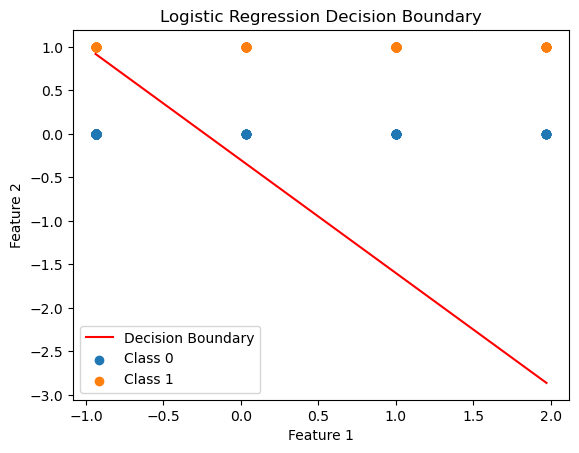

In [25]:
X = data.drop('output', axis=1)
y = data['output']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, num_epochs, learning_rate):
    num_samples, num_features = X.shape
    theta = np.zeros(num_features)
    
    for epoch in range(num_epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        
        gradient = np.dot(X.T, (h - y)) / num_samples
        theta -= learning_rate * gradient
        
        if epoch % 100 == 0:
            cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
            print(f"Epoch {epoch}, Cost: {cost:.4f}")
    
    return theta

num_epochs = 1000
learning_rate = 0.01

theta = logistic_regression(X_bias, y, num_epochs, learning_rate)

# Plot the decision boundary (Note: This part assumes a 2D dataset for simplicity)
plt.scatter(X[y == 0][:, 0], y[y==0], label='Class 0')
plt.scatter(X[y == 1][:, 0], y[y==1], label='Class 1')

# Calculate and plot the decision boundary line
x_boundary = np.array([min(X[:, 0]), max(X[:, 0])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]
plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()

Accuracy: 0.7591
Precision: 0.7875
Recall: 0.7636
F1-Score: 0.7754


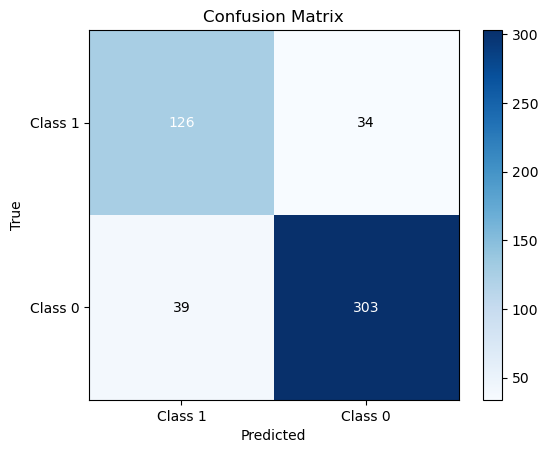

In [11]:
predictions = sigmoid(np.dot(X_bias, theta))
predicted_classes = predictions >= 0.5

accuracy = np.mean(predicted_classes == y)
print(f"Accuracy: {accuracy:.4f}")

true_positive = np.sum(predicted_classes[y == 1])
false_positive = np.sum(predicted_classes[y == 0])
false_negative = np.sum(~predicted_classes[y == 1])

precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

confusion_matrix = np.array([[true_positive, false_positive], [false_negative, X.shape[0]]])
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)

plt.text(0, 0, str(confusion_matrix[0, 0]), ha='center', va='center', color='white')
plt.text(1, 1, str(confusion_matrix[1, 1]), ha='center', va='center', color='white')
plt.text(1, 0, str(confusion_matrix[0, 1]), ha='center', va='center', color='black')
plt.text(0, 1, str(confusion_matrix[1, 0]), ha='center', va='center', color='black')

plt.xticks(tick_marks, ['Class 1', 'Class 0'])
plt.yticks(tick_marks, ['Class 1', 'Class 0'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()